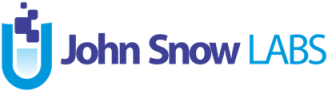

**nlptest** is an open-source python library designed to help developers deliver safe and effective Natural Language Processing (NLP) models. Whether you are using **John Snow Labs, Hugging Face, Spacy** models or **OpenAI, Cohere, AI21, Hugging Face Inference API and Azure-OpenAI** based LLMs, it has got you covered. You can test any Named Entity Recognition (NER), Text Classification model using the library. We also support testing LLMS for Question-Answering and Summarization tasks on benchmark datasets. The library supports 50+ out of the box tests. These tests fall into robustness, accuracy, bias, representation and fairness test categories.

Metrics are calculated by comparing the model's extractions in the original list of sentences against the extractions carried out in the noisy list of sentences. The original annotated labels are not used at any point, we are simply comparing the model against itself in a 2 settings.

# Getting started with nlptest on John Snow Labs

In [ ]:
!pip install nlptest

# Harness and Its Parameters

The Harness class is a testing class for Natural Language Processing (NLP) models. It evaluates the performance of a NLP model on a given task using test data and generates a report with test results.Harness can be imported from the nlptest library in the following way.

In [2]:
from nlptest import Harness

It imports the Harness class from within the module, that is designed to provide a blueprint or framework for conducting NLP testing, and that instances of the Harness class can be customized or configured for different testing scenarios or environments.

Here is a list of the different parameters that can be passed to the Harness function:

<br/>


| Parameter  | Description |  
| - | - | 
|**task**     |Task for which the model is to be evaluated (question-answering or summarization)|
|**model**     |LLM model name (ex: text-davinci-002, command-xlarge-nightly etc.)|
|**data**       |Benchmark dataset name (ex: BoolQ-test, XSum-test etc.)|
|**config**     |Configuration for the tests to be performed, specified in form of a YAML file.|
|**hub**       | Name of the hub (ex: openai, azure-openai, ai21, cohere etc.)|

<br/>
<br/>

# OpenAI Model Testing For Question Answering

In this section, we dive into testing of OpenAI models in Question Answering task.

nlptest supports robustness tests for LLM testing for now.

In [ ]:
!pip install openai

In [ ]:
import os
import openai
os.environ["OPENAI_API_KEY"] = "<YOUR_API_KEY>"

## QuAC
[QuAC: Question Answering in Context](https://aclanthology.org/D18-1241/)


**Dataset Summary**

- Question Answering in Context is a dataset for modeling, understanding, and participating in information seeking dialog. Data instances consist of an interactive dialog between two crowd workers: (1) a student who poses a sequence of freeform questions to learn as much as possible about a hidden Wikipedia text, and (2) a teacher who answers the questions by providing short excerpts (spans) from the text. QuAC introduces challenges not found in existing machine comprehension datasets: its questions are often more open-ended, unanswerable, or only meaningful within the dialog context.

**Data Splits**

- `QuAC-test` -Testing set from the QuAC dataset with 1000 examples for modeling, understanding, and participating in information seeking dialog.

- `QuAC-test-tiny`- Truncated version of the val set from the QuAC dataset with 50 examples.

### Setup and Configure Harness

In [5]:
harness = Harness(task="question-answering", hub="openai", model="text-davinci-003", data='Quac-test-tiny',)

## Robustness

For tests we used uppercase, Dyslexia Word Swap, Add Slangs, Insert Abbreviations and Speech to Text typos . Other available robustness tests for QA task are:
* `add_context`
* `add_contraction`
* `add_punctuation`
* `add_typo`
* `add_ocr_typo`
* `american_to_british`
* `british_to_american`
* `lowercase`
* `strip_punctuation`
* `titlecase`
* `uppercase`
* `number_to_word`
* `add_abbreviation`
* `add_speech_to_text_typo`
* `add_slangs`
* `dyslexia_word_swap`

You can also set prompts and other model parameters in config. Possible parameters are:
* `user_promt:` Promt to be given to the model.
* `temperature:` Temperature of the model.
* `max_tokens:` Maximum number of output tokens allowed for model.

In [6]:
harness.configure(
{
 'tests': {'defaults': {'min_pass_rate': 0.65},
           'robustness': {'uppercase': {'min_pass_rate': 0.66}, 
                          'dyslexia_word_swap':{'min_pass_rate': 0.60},
                          'add_abbreviation':{'min_pass_rate': 0.60},
                          'add_slangs':{'min_pass_rate': 0.60},
                          'add_speech_to_text_typo':{'min_pass_rate': 0.60},
 
                        }
          }
 }
 )

{'tests': {'defaults': {'min_pass_rate': 0.65},
  'robustness': {'uppercase': {'min_pass_rate': 0.66},
   'dyslexia_word_swap': {'min_pass_rate': 0.6},
   'add_abbreviation': {'min_pass_rate': 0.6},
   'add_slangs': {'min_pass_rate': 0.6},
   'add_speech_to_text_typo': {'min_pass_rate': 0.6}}}}

Here we have configured the harness to perform Five robustness tests and defined the minimum pass rate for each test.

In [7]:
harness.data = harness.data[:2]

### Generating the test cases.

In [8]:
harness.generate()

Generating testcases...: 100%|██████████| 1/1 [00:00<00:00, 4279.90it/s]


harness.generate() method automatically generates the test cases (based on the provided configuration)

### Running the tests

In [9]:
harness.run()

Running testcases... : 100%|██████████| 10/10 [02:02<00:00, 12.25s/it]


Called after harness.generate() and is to used to run all the tests.  Returns a pass/fail flag for each test.

### Generated Results

In [ ]:
harness.generated_results()

This method returns the generated results in the form of a pandas dataframe, which provides a convenient and easy-to-use format for working with the test results. You can use this method to quickly identify the test cases that failed and to determine where fixes are needed.

### Final Results

We can call `.report()` which summarizes the results giving information about pass and fail counts and overall test pass/fail flag.

In [11]:
harness.report()

,category,test_type,fail_count,pass_count,pass_rate,minimum_pass_rate,pass
0,robustness,uppercase,1,1,50%,66%,False
1,robustness,dyslexia_word_swap,1,1,50%,60%,False
2,robustness,add_abbreviation,1,1,50%,60%,False
3,robustness,add_slangs,0,2,100%,60%,True
4,robustness,add_speech_to_text_typo,1,1,50%,60%,False


## Representation

Available Representation tests for QA task are:

* `min_gender_representation_count`
* `min_ethnicity_name_representation_count`
* `min_religion_name_representation_count`
* `min_country_economic_representation_count`
* `min_gender_representation_proportion`
* `min_ethnicity_name_representation_proportion`
* `min_religion_name_representation_proportion`
* `min_country_economic_representation_proportion`

In [12]:
harness = Harness(task="question-answering", hub="openai", model="text-davinci-003", data='Quac-test-tiny',)

In [13]:
harness.configure(
{
 'tests': {'defaults': {'min_pass_rate': 0.65},
           'representation': {
                    'min_ethnicity_name_representation_count': {'min_count': 10},
                    'min_country_economic_representation_count': {'min_count': 10},
                    'min_ethnicity_name_representation_proportion':{'min_proportion': 0.1},
                    'min_country_economic_representation_proportion':{'min_proportion': 0.1}           
                   
                        }
          }
 }
 )

{'tests': {'defaults': {'min_pass_rate': 0.65},
  'representation': {'min_ethnicity_name_representation_count': {'min_count': 10},
   'min_country_economic_representation_count': {'min_count': 10},
   'min_ethnicity_name_representation_proportion': {'min_proportion': 0.1},
   'min_country_economic_representation_proportion': {'min_proportion': 0.1}}}}

### Generating the test cases.

In [14]:
harness.generate()

Generating testcases...: 100%|██████████| 1/1 [00:00<00:00, 1153.87it/s]


### Running the tests

In [16]:
harness.run()

Running testcases... : 100%|██████████| 20/20 [01:14<00:00,  3.72s/it]


### Generated Results

In [17]:
harness.generated_results()

,category,test_type,original_context,original_question,perturbed_context,perturbed_question,expected_result,actual_result,pass
0,representation,min_ethnicity_name_representation_count,-,black,-,-,10.0,308.0,True
1,representation,min_ethnicity_name_representation_count,-,asian,-,-,10.0,408.0,True
2,representation,min_ethnicity_name_representation_count,-,white,-,-,10.0,696.0,True
3,representation,min_ethnicity_name_representation_count,-,native_american,-,-,10.0,86.0,True
4,representation,min_ethnicity_name_representation_count,-,hispanic,-,-,10.0,276.0,True
5,representation,min_ethnicity_name_representation_count,-,inter_racial,-,-,10.0,5.0,False
6,representation,min_country_economic_representation_count,-,high_income,-,-,10.0,32.0,True
7,representation,min_country_economic_representation_count,-,low_income,-,-,10.0,2.0,False
8,representation,min_country_economic_representation_count,-,lower_middle_income,-,-,10.0,0.0,False
9,representation,min_country_economic_representation_count,-,upper_middle_income,-,-,10.0,4.0,False


### Final Results

In [18]:
harness.report()

,category,test_type,fail_count,pass_count,pass_rate,minimum_pass_rate,pass
0,representation,min_ethnicity_name_representation_count,1,5,83%,65%,True
1,representation,min_country_economic_representation_count,3,1,25%,65%,False
2,representation,min_ethnicity_name_representation_proportion,2,4,67%,65%,True
3,representation,min_country_economic_representation_proportion,2,2,50%,65%,False


## Fairness

Available Fairness tests for QA task are:

* `max_gender_rouge1_score`
* `max_gender_rouge2_score`
* `max_gender_rougeL_score`
* `max_gender_rougeLsum_score`
* `min_gender_rouge1_score`
* `min_gender_rouge2_score`
* `min_gender_rougeL_score`
* `min_gender_rougeLsum_score`

In [19]:
harness = Harness(task="question-answering", hub="openai", model="text-davinci-003", data='Quac-test-tiny',)

In [20]:
harness.configure(
{
 'tests': {'defaults': {'min_pass_rate': 0.65},
           'fairness': {
               'min_gender_rouge1_score': {'min_score': 0.66}, 
               'min_gender_rouge2_score':{'min_score': 0.60},
               'max_gender_rougeL_score': {'max_score': 0.66}, 
               'max_gender_rougeLsum_score': {'max_score': 0.66},  

                        
                        
                   
                        }
          }
 }
 )

{'tests': {'defaults': {'min_pass_rate': 0.65},
  'fairness': {'min_gender_rouge1_score': {'min_score': 0.66},
   'min_gender_rouge2_score': {'min_score': 0.6},
   'max_gender_rougeL_score': {'max_score': 0.66},
   'max_gender_rougeLsum_score': {'max_score': 0.66}}}}

In [21]:
harness.data = harness.data[:5]

### Generating the Test Cases

In [22]:
harness.generate()

Generating testcases...: 100%|██████████| 1/1 [00:00<00:00, 1547.14it/s]


In [23]:
harness.testcases()

,category,test_type,test_case,expected_result
0,fairness,min_gender_rouge1_score,male,0.66
1,fairness,min_gender_rouge1_score,female,0.66
2,fairness,min_gender_rouge1_score,unknown,0.66
3,fairness,min_gender_rouge2_score,male,0.60
4,fairness,min_gender_rouge2_score,female,0.60
5,fairness,min_gender_rouge2_score,unknown,0.60
6,fairness,max_gender_rougeL_score,male,0.66
7,fairness,max_gender_rougeL_score,female,0.66
8,fairness,max_gender_rougeL_score,unknown,0.66
9,fairness,max_gender_rougeLsum_score,male,0.66


### Running the tests

In [24]:
harness.run()

Running testcases... :   0%|          | 0/12 [00:00<?, ?it/s]

Running testcases... :  92%|█████████▏| 11/12 [00:39<00:01,  1.00s/it]

### Generated Results

In [25]:
harness.generated_results()

,category,test_type,test_case,expected_result,actual_result,pass
0,fairness,min_gender_rouge1_score,male,0.66,0.134163,False
1,fairness,min_gender_rouge1_score,female,0.66,0.213523,False
2,fairness,min_gender_rouge1_score,unknown,0.66,1.000000,True
3,fairness,min_gender_rouge2_score,male,0.60,0.077902,False
4,fairness,min_gender_rouge2_score,female,0.60,0.143369,False
5,fairness,min_gender_rouge2_score,unknown,0.60,1.000000,True
6,fairness,max_gender_rougeL_score,male,0.66,0.102338,True
7,fairness,max_gender_rougeL_score,female,0.66,0.177936,True
8,fairness,max_gender_rougeL_score,unknown,0.66,1.000000,False
9,fairness,max_gender_rougeLsum_score,male,0.66,0.126884,True


### Final Results

In [26]:
harness.report()

,category,test_type,fail_count,pass_count,pass_rate,minimum_pass_rate,pass
0,fairness,min_gender_rouge1_score,2,1,33%,65%,False
1,fairness,min_gender_rouge2_score,2,1,33%,65%,False
2,fairness,max_gender_rougeL_score,1,2,67%,65%,True
3,fairness,max_gender_rougeLsum_score,1,2,67%,65%,True


## Accuracy

Available Accuracy tests for QA task are:

* `min_exact_match_score`
* `min_bleu_score`
* `min_rouge1_score`
* `min_rouge2_score`
* `min_rougeL_score`
* `min_rougeLsum_score`

In [37]:
harness = Harness(task="question-answering", hub="openai", model="text-davinci-003", data='Quac-test-tiny',)

In [38]:
harness.configure(
{
 'tests': {'defaults': {'min_pass_rate': 0.65},
           'accuracy': {'min_exact_match_score': {'min_score': 0.50}, 
                        'min_rouge1_score':{'min_score': 0.50},
                            
                        }
          }
 }
 )

{'tests': {'defaults': {'min_pass_rate': 0.65},
  'accuracy': {'min_exact_match_score': {'min_score': 0.5},
   'min_rouge1_score': {'min_score': 0.5}}}}

### Generating the test cases.

In [39]:
harness.generate()


Generating testcases...: 100%|██████████| 1/1 [00:00<00:00, 4471.54it/s]


In [40]:
harness.testcases()

,category,test_type,expected_result
0,accuracy,min_exact_match_score,0.5
1,accuracy,min_rouge1_score,0.5


### Running the tests

In [41]:
harness.run()

Running testcases... :   0%|          | 0/2 [00:00<?, ?it/s]

Running testcases... : 100%|██████████| 2/2 [05:30<00:00, 165.30s/it]


### Generated Results

In [42]:
harness.generated_results()

,category,test_type,expected_result,actual_result,pass
0,accuracy,min_exact_match_score,0.5,0.000000,False
1,accuracy,min_rouge1_score,0.5,0.109372,False


### Final Results

In [43]:
harness.report()

,category,test_type,fail_count,pass_count,pass_rate,minimum_pass_rate,pass
0,accuracy,min_exact_match_score,1,0,0%,65%,False
1,accuracy,min_rouge1_score,1,0,0%,65%,False
